**Step 1: Install Required Libraries**

In [ ]:
pip install scikit-learn


**Step 2: Import Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import datetime

**Step 3: Load and Prepare Data**

In [ ]:
# Load your dataset
data = pd.read_csv('/content/slt_data_final.csv')

# Print the column names
print(data.columns)


Index(['PROD_ACTION', 'ADDING_PROMO', 'Deleting_PROMO', 'Age', 'PRODUCT_NAME',
       'CATOGORY', 'Package_duration', 'Voice_offnet_call_duration',
       'voice_onnet_call_duration', 'voice_local_duration',
       'voice_IDD_call_duration', 'Used_data_GB', 'extraGB_amount',
       'peo_package', 'additional_event_cost', 'peo_TV_charge'],
      dtype='object')


<ipython-input-4-52f8a2f77c0f>:2: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/slt_data_final.csv')


In [ ]:
data['CATOGORY'] = data['CATOGORY'].replace({'DOUBLE_PLAY_VOICE_BB':2 , 'DOUBLE_PLAY_VOICE_PEO':22 ,'SINGLE_PLAY':1,'TRIPLE_PLAY':3})

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df

,PROD_ACTION,ADDING_PROMO,Deleting_PROMO,Age,PRODUCT_NAME,CATOGORY,Package_duration,Voice_offnet_call_duration,voice_onnet_call_duration,voice_local_duration,voice_IDD_call_duration,Used_data_GB,extraGB_amount,peo_package,additional_event_cost,peo_TV_charge
0,NaN,NaN,NaN,NaN,NaN,2,0,0,0,0,22,102.334588,8,0,0,0
1,NaN,NaN,NaN,NaN,NaN,2,0,0,0,0,0,457.914000,0,0,0,0
2,NaN,NaN,NaN,NaN,NaN,2,0,0,0,0,0,331.441000,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,3,0,0,0,0,0,420.018555,84,1125,3130,4255
4,NaN,NaN,NaN,NaN,NaN,3,0,0,0,0,1610,747.546000,0,1875,6525,8400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131070,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0.000000,80,0,0,0
131071,NaN,NaN,NaN,NaN,NaN,1,0,49093,57385,106478,0,0.000000,0,0,0,0
131072,NaN,NaN,NaN,NaN,NaN,2,0,0,0,0,0,186.315051,67,0,4944,4944
131073,NaN,NaN,NaN,NaN,NaN,1,0,67352,0,67352,0,0.000000,0,0,0,0


In [ ]:
# Define X (features) and y (target)

X = data[['Package_duration', 'voice_local_duration', 'Used_data_GB' , 'extraGB_amount' , 'peo_TV_charge']]
y = data[ 'CATOGORY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 4: Build and Train the Random Forest Model**

In [ ]:
# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Step 5: Make Predictions**

In [ ]:
# Make predictions on the testing data
y_pred = clf.predict(X_test)


**Step 6: Evaluate Model Performance**

In [ ]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Accuracy: 0.86
              precision    recall  f1-score   support

           1       0.89      0.89      0.89      7824
           2       0.90      0.88      0.89      8027
           3       0.79      0.81      0.80      5104
          22       0.81      0.82      0.81      5260

    accuracy                           0.86     26215
   macro avg       0.85      0.85      0.85     26215
weighted avg       0.86      0.86      0.86     26215

[[6948  250  109  517]
 [ 327 7069  538   93]
 [ 122  425 4129  428]
 [ 423   87  435 4315]]


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import recall_score


In [ ]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print('F1 score:', f1)
print('Precision:', precision)
print(f'Recall: {recall}')
print('R^2:', r2)
print('MSE:', mse)

F1 score: 0.8571239529493825
Precision: 0.8575904226290183
Recall: 0.8567995422468052
R^2: 0.5335655551708527
MSE: 30.537745565515927


In [ ]:
residual_error = y_test - y_pred
print(residual_error)

5794     -1
109075    0
93613    -2
75343     0
129430    0
         ..
89503     0
82026     0
98593     0
107744    0
105838    0
Name: CATOGORY, Length: 26215, dtype: int64


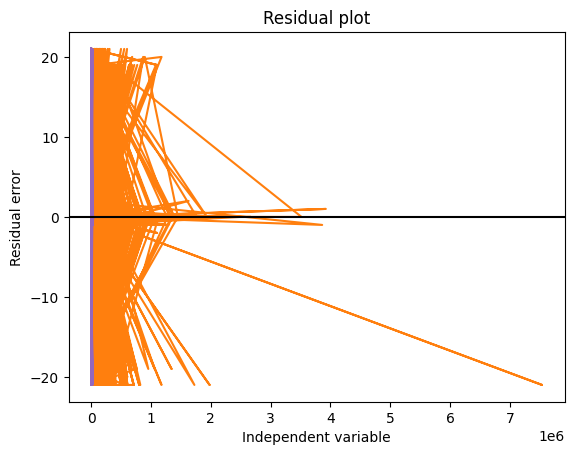

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X_test, residual_error)
plt.xlabel('Independent variable')
plt.ylabel('Residual error')
plt.axhline(0, color='black')
plt.title('Residual plot')
plt.show()

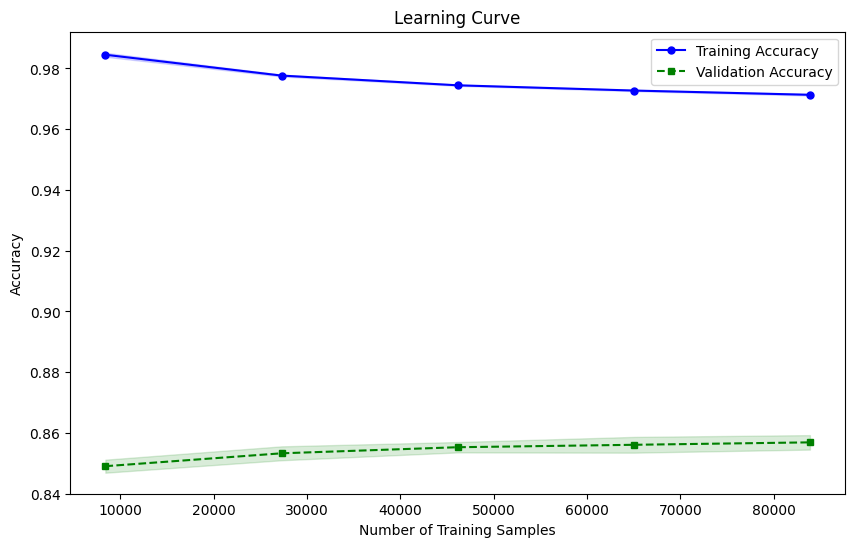

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

**Regularization**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are defined

# Create a Random Forest Classifier with regularization (adjust alpha)
clf_regularized = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split=5, min_samples_leaf=2, max_depth=10)

# Train the regularized model on the training data
clf_regularized.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_regularized = clf_regularized.predict(X_test)

# Evaluate the regularized model's accuracy
accuracy_regularized = accuracy_score(y_test, y_pred_regularized)
print(f'Regularized Model Accuracy: {accuracy_regularized:.2f}')


Regularized Model Accuracy: 0.87


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Assuming X_train, X_test, y_train, y_test are defined

# Create a Random Forest Classifier with regularization
clf_regularized = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split=5, min_samples_leaf=2, max_depth=10)

# Train the regularized model on the training data
clf_regularized.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_regularized = clf_regularized.predict(X_test)

# Evaluate the regularized model's accuracy
accuracy_regularized = accuracy_score(y_test, y_pred_regularized)
print(f'Regularized Model Accuracy: {accuracy_regularized:.2f}')

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_regularized, average='weighted')
recall = recall_score(y_test, y_pred_regularized, average='weighted')
f1 = f1_score(y_test, y_pred_regularized, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred_regularized)
print(report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_regularized)
print(conf_matrix)

Regularized Model Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1-score: 0.87
              precision    recall  f1-score   support

           1       0.90      0.88      0.89      7824
           2       0.93      0.88      0.90      8027
           3       0.82      0.83      0.82      5104
          22       0.79      0.88      0.83      5260

    accuracy                           0.87     26215
   macro avg       0.86      0.86      0.86     26215
weighted avg       0.87      0.87      0.87     26215

[[6873  212   59  680]
 [ 340 7031  586   70]
 [ 102  295 4212  495]
 [ 291   56  285 4628]]


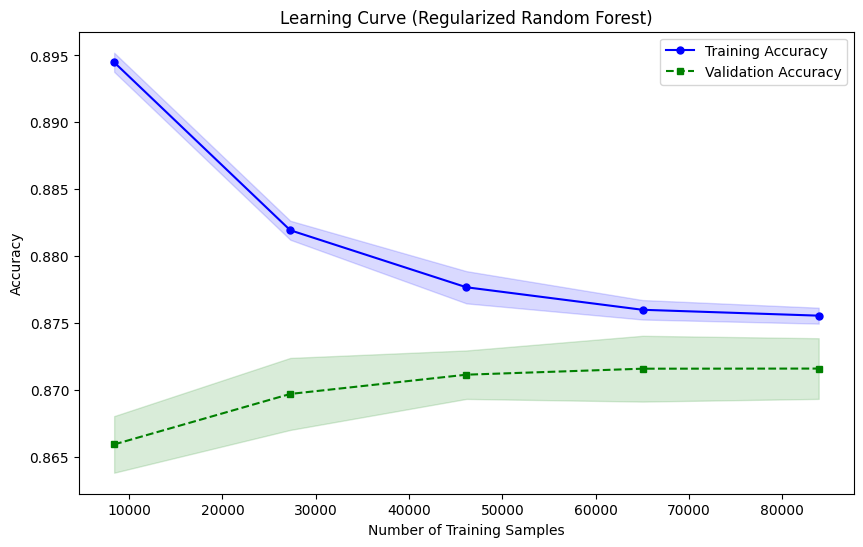

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are defined

# Create a Random Forest Classifier with regularization
clf_regularized = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split=5, min_samples_leaf=2, max_depth=10)

# Get the learning curve
train_sizes, train_scores, test_scores = learning_curve(clf_regularized, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation for training and test sets
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Regularized Random Forest)')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming X_train, X_test, y_train, y_test are defined

# Create a Random Forest Classifier with regularization
clf_regularized = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split=5, min_samples_leaf=2, max_depth=10)

# Train the regularized model on the training data
clf_regularized.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_regularized = clf_regularized.predict(X_test)

# Evaluate the regularized model's accuracy on the test set
accuracy_regularized = accuracy_score(y_test, y_pred_regularized)
print(f'Regularized Model Accuracy on Test Set: {accuracy_regularized:.2f}')

# Cross-Validation Scores
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust n_splits and other parameters as needed
cross_val_scores = cross_val_score(clf_regularized, X_train, y_train, cv=cv, scoring='accuracy')

# Calculate Mean and Standard Deviation of Cross-Validation Scores
mean_cv_accuracy = np.mean(cross_val_scores)
std_cv_accuracy = np.std(cross_val_scores)

print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean Cross-Validation Accuracy: {mean_cv_accuracy:.2f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {std_cv_accuracy:.2f}')

# Training Accuracy
y_pred_train = clf_regularized.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Training Accuracy: {accuracy_train:.2f}')

Regularized Model Accuracy on Test Set: 0.87
Cross-Validation Scores: [0.87197215 0.87187679 0.87535762 0.87149533 0.8680145 ]
Mean Cross-Validation Accuracy: 0.87
Standard Deviation of Cross-Validation Accuracy: 0.00
Training Accuracy: 0.88


In [ ]:
# Define a loyalty threshold in days, e.g., 730 days
loyalty_threshold = 730

# Train your model as before

# Make predictions
predictions = clf.predict(X_test)

# Classify customers based on loyalty
loyal_customers = X_test['Package_duration'] < loyalty_threshold

# Define a list to store upgrade recommendations
upgrade_recommendations = []

# Loop through predictions and classify customers for recommendations
for prediction, is_loyal in zip(predictions, loyal_customers):
    if prediction == 'SINGLE_PLAY':
        if is_loyal:
            upgrade_recommendations.append('DOUBLE_PLAY_VOICE_PEO')
        else:
            upgrade_recommendations.append('DOUBLE_PLAY_VOICE_BB')
    elif prediction == 'DOUBLE_PLAY_VOICE_PEO' or 'DOUBLE_PLAY_VOICE_BB' :
        if is_loyal:
            upgrade_recommendations.append('TRIPLE_PLAY')

